In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('TestScores.csv')
df.head()

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel
0,2000-2001,Spring,CSAP Math,CSAP,Math,401551,05,208.0,Barrett Elementary School,Math,NaN,NaN,NaN,NS
1,2000-2001,Spring,CSAP Reading,CSAP,Reading,401551,05,208.0,Barrett Elementary School,Reading,NaN,NaN,NaN,NS
2,2001-2002,Spring,CSAP Math,CSAP,Math,401551,06,404.0,Gove Middle School,Math,NaN,NaN,NaN,NS
3,2001-2002,Spring,CSAP Reading,CSAP,Reading,401551,06,404.0,Gove Middle School,Reading,NaN,NaN,NaN,NS
4,2001-2002,Spring,CSAP Writing,CSAP,Writing,401551,06,404.0,Gove Middle School,Writing,NaN,NaN,NaN,NS


In [3]:
df.shape

(289456, 14)

In [4]:
df.isna().sum()

SchoolYear               0
Semester                 0
TestName                 0
TestCategory             0
MeasureCode              0
StudentNumber            0
Grade                  131
SchoolNum             4775
SchoolName            4775
SkillName                0
RawScore            242427
ScaleScore           28611
Growth              274586
ProficiencyLevel    209566
dtype: int64

Test information is spread over four columns:  TestName, TestCategory, MeasureCode, and SkillName.  However, none specifies a unique test.  It looks like the combination of TestName and MeasureCode uniquely specifies each test.  So we'll add a column that's a combination of those two.

In [5]:
df['Test'] = df.TestName.map(str) + ' ' + df.MeasureCode
df.head()

,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
0,2000-2001,Spring,CSAP Math,CSAP,Math,401551,05,208.0,Barrett Elementary School,Math,NaN,NaN,NaN,NS,CSAP Math Math
1,2000-2001,Spring,CSAP Reading,CSAP,Reading,401551,05,208.0,Barrett Elementary School,Reading,NaN,NaN,NaN,NS,CSAP Reading Reading
2,2001-2002,Spring,CSAP Math,CSAP,Math,401551,06,404.0,Gove Middle School,Math,NaN,NaN,NaN,NS,CSAP Math Math
3,2001-2002,Spring,CSAP Reading,CSAP,Reading,401551,06,404.0,Gove Middle School,Reading,NaN,NaN,NaN,NS,CSAP Reading Reading
4,2001-2002,Spring,CSAP Writing,CSAP,Writing,401551,06,404.0,Gove Middle School,Writing,NaN,NaN,NaN,NS,CSAP Writing Writing


In [6]:
scores = df.ScaleScore.unique().astype('str')
for score in np.sort(scores):
    print(score)

0
0.0
0.142
0.176
0.187
0.235
0.25
0.27699999999999997
0.277
0.285
0.294
0.312
0.312
0.333
0.352
0.375
0.411
0.444
0.47
0.5
0.5
0.526
0.555
0.571
0.666
0.687
0.75
0.944
1
1.0
1.3
1.4
1.5
1.6
10
10.0
10.2
10.3
10.34
10.34
10.5
10.53
10.6
10.7
10.71
10.77
10.8
10.81
10.87
10.87
10.91
100
100.0
1000
10000
10000.0
1002
1003
1004
1005
1007
1008
101
101.0
1010
1012
1013
1014
1015
1016
1017
1018
1019
102
102.0
1020
1021
1021.0
1024
1025
1026
1026.93
1027
1027.0
1027.52
1029
103
103.0
1030
1031.13
1034
1035
1036
1038
1039
1039.0
104
104.0
1040
1040.35
1041
1042
1043
1045
1045.0
1046
1046.0
1047
1048
1049
1049.43
105
105.0
1050.57
1053
1054
1055
1056
1058
1058.18
106
106.0
1060
1061
1062
1063
1064
1067
1068
1069
107
107.0
1070
1071
1074
1075
1076
1077
1078
1079
108
108.0
1081
1083
1084
1084.78
1086
1087
1088
109
109.0
1091
1092
1092.66
1092.66
1094
1095.19
1096
1096.3
1097
1097.14
11
11.0
11.1
11.11
11.11
11.32
11.4
11.43
11.5
11.54
11.54
11.63
11.76
110
110.0
1102
1103
1103.0
1104
1105.17
1107

21.15
21.2
21.21
21.28
21.28
21.4
21.43
21.43
21.54
21.57
21.6
21.62
21.7
21.74
21.74
21.79
21.88
21.9
21.95
21.95
210
210.0
210.12
210.14
210.19
210.4
210.41
210.51
210.55
210.68
210.83
210.84
210.87
210.94
2105.65
2105.78
2106.67
2107.99
2109.83
211
211.0
211.01
211.12
211.18
211.31
211.34
211.37
211.47
211.48
211.72
211.73
211.74
211.84
211.85
211.87
211.93
211.95
2110.3
2115.84
2116.65
2117.12
212
212.0
212.06
212.08
212.09
212.12
212.2
212.26
212.26
212.43
212.48
212.54
212.58
212.65
212.77
212.88
212.91
212.98
2120.99
2121.05
2123.76
2125.55
2126.42
213
213.0
213.06
213.33
213.37
213.4
213.43
213.44
213.59
213.59
213.62
213.65
213.67
213.83
213.96
2137.99
2139.22
214
214.0
214.04
214.11
214.18
214.21
214.24
214.35
214.49
214.52
214.53
214.57
214.57
214.7
214.74
214.75
214.87
214.93
214.98
2143.92
2146.49
2148.0
215
215.0
215.04
215.26
215.3
215.37
215.64
215.74
215.83
215.84
215.95
2155.65
2155.95
2159.52
216
216.0
216.06
216.06
216.29
216.36
216.38
216.46
216.47
216.54
216.58
21

52.94
520
520.0
521
521.0
522
522.0
523
523.0
524
524.0
525
525.0
526
526.0
527
527.0
528
528.0
529
529.0
53
53.0
53.06
53.06
53.1
53.12
53.13
53.13
53.19
53.2
53.3
53.33
53.57
53.57
53.6
53.66
53.7
53.8
53.85
53.85
530
530.0
531
531.0
532
532.0
533
533.0
534
534.0
535
535.0
536
536.0
537
538
538.0
539
539.0
54
54.0
54.05
54.1
54.17
54.17
54.2
54.29
54.3
54.35
54.4
54.5
54.55
54.55
54.72
54.76
54.8
54.84
54.9
540
540.0
541
541.0
542
542.0
543
543.0
544
544.0
545
545.0
546
546.0
547
547.0
548
548.0
549
549.0
55
55.0
55.1
55.17
55.2
55.3
55.32
55.36
55.56
55.56
55.6
55.81
55.88
55.88
55.9
550
551
551.0
552
552.0
553
553.0
554
554.0
555
555.0
556
556.0
557
557.0
558
558.0
559
559.0
56
56.0
56.1
56.2
56.25
56.36
56.41
56.5
56.52
56.6
56.6
56.67
56.7
56.76
56.8
56.86
560
560.0
561
562
562.0
563
563.0
564
564.0
565
565.0
566
566.0
567
567.0
568
568.0
569
569.0
57
57.0
57.1
57.14
57.14
57.4
57.5
57.58
57.6
57.69
57.69
57.7
57.78
57.89
57.9
570
570.0
571
571.0
572
572.0
573
573.0
574
575
575.0

There are four score columns, but the most useful will be ScaleScore.  We need to convert that to an int, but it contains alphanumeric scores indicating no score:  ABS: Absent, EXM: Exempt, INV: Invalid, and NS: No Score.  We'll convert all of these to NaN so that those rows can be dropped and the data type converted to a numeric value.

In [7]:
df.ScaleScore[df.ScaleScore=='INV'] = np.NaN
df.ScaleScore[df.ScaleScore=='NS'] = np.NaN
df.ScaleScore[df.ScaleScore=='ABS'] = np.NaN
df.ScaleScore[df.ScaleScore=='EXM'] = np.NaN
df.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
0,2000-2001,Spring,CSAP Math,CSAP,Math,401551,05,208.0,Barrett Elementary School,Math,NaN,NaN,NaN,NS,CSAP Math Math
1,2000-2001,Spring,CSAP Reading,CSAP,Reading,401551,05,208.0,Barrett Elementary School,Reading,NaN,NaN,NaN,NS,CSAP Reading Reading
2,2001-2002,Spring,CSAP Math,CSAP,Math,401551,06,404.0,Gove Middle School,Math,NaN,NaN,NaN,NS,CSAP Math Math
3,2001-2002,Spring,CSAP Reading,CSAP,Reading,401551,06,404.0,Gove Middle School,Reading,NaN,NaN,NaN,NS,CSAP Reading Reading
4,2001-2002,Spring,CSAP Writing,CSAP,Writing,401551,06,404.0,Gove Middle School,Writing,NaN,NaN,NaN,NS,CSAP Writing Writing


Now we'll delete all rows with NaN in the ScaleScore column, then convert remaining values to floats.

In [8]:
df = df[pd.notnull(df.ScaleScore)]
df.shape

(260417, 15)

In [9]:
df.ScaleScore = df.ScaleScore.astype('float')

Start checking dtypes

In [10]:
df.dtypes

SchoolYear           object
Semester             object
TestName             object
TestCategory         object
MeasureCode          object
StudentNumber         int64
Grade                object
SchoolNum           float64
SchoolName           object
SkillName            object
RawScore            float64
ScaleScore          float64
Growth              float64
ProficiencyLevel     object
Test                 object
dtype: object

In [11]:
# Change SchoolYear column to datetime format
df.SchoolYear = pd.to_datetime(df.SchoolYear.str[:4])

In [12]:
df.dtypes

SchoolYear          datetime64[ns]
Semester                    object
TestName                    object
TestCategory                object
MeasureCode                 object
StudentNumber                int64
Grade                       object
SchoolNum                  float64
SchoolName                  object
SkillName                   object
RawScore                   float64
ScaleScore                 float64
Growth                     float64
ProficiencyLevel            object
Test                        object
dtype: object

In [13]:
df.Grade.unique()

array(['08', '09', '11', '10', '04', '05', '06', '07', '03', '01', '02',
       '12', '00', 'EC', nan], dtype=object)

In [14]:
df.Grade.isna().sum()

72

The Grade column contains some NaN values that could not be resolved, so we'll drop those columns.  It also contains a value of 'EC' or Early Childhood, which was used interchageably with Grade 00.  I'll convert EC to 0, and convert the data type to int.

In [15]:
df = df[pd.notnull(df['Grade'])]
df.shape

(260345, 15)

In [16]:
df.Grade[df.Grade=='EC'] = '00'

In [17]:
df.Grade = df.Grade.astype('int')
df.dtypes

SchoolYear          datetime64[ns]
Semester                    object
TestName                    object
TestCategory                object
MeasureCode                 object
StudentNumber                int64
Grade                        int64
SchoolNum                  float64
SchoolName                  object
SkillName                   object
RawScore                   float64
ScaleScore                 float64
Growth                     float64
ProficiencyLevel            object
Test                        object
dtype: object

In [18]:
tests = df.Test.unique()
#print(tests)
print(len(tests))


2543


In [19]:
# Convert values in Test column to column headers in another df
df2 = pd.pivot_table(df, values = 'ScaleScore',index=['StudentNumber', 'SchoolYear', 'Grade'],columns='Test',aggfunc=np.max)
df2.head(50)
# aggregate by max score

Test                            10th GR Language Arts SCAN Assessment 1 DSSN English 1415 Literacy  \
StudentNumber SchoolYear Grade                                                                       
401551        2003-01-01 8                                                    NaN                    
              2004-01-01 9                                                    NaN                    
              2006-01-01 11                                                   NaN                    
401568        2003-01-01 8                                                    NaN                    
              2004-01-01 9                                                    NaN                    
              2005-01-01 10                                                   NaN                    
              2006-01-01 10                                                   NaN                    
              2007-01-01 11                                                   NaN                    
405587        2000-01-01 4                                                    NaN                    
              2001-01-01 5                                                    NaN                    
              2002-01-01 6                                                    NaN                    
              2003-01-01 7                                                    NaN                    
              2004-01-01 7                                                    NaN                    
              2005-01-01 8                                                    NaN                    
              2006-01-01 8                                                    NaN                    
                         9                                                    NaN                    
              2007-01-01 10                                                   NaN                    
              2008-01-01 11                                                   NaN                    
415101        2003-01-01 6                                                    NaN                    
              2004-01-01 7                                                    NaN                    
              2005-01-01 8                                                    NaN                    
              2006-01-01 9                                                    NaN                    
              2007-01-01 11                                                   NaN                    
              2010-01-01 9                                                    NaN                    
                         10                                                   NaN                    
              2011-01-01 11                                                   NaN                    
417458        2003-01-01 7                                                    NaN                    
              2004-01-01 8                                                    NaN                    
              2005-01-01 9                                                    NaN                    
              2006-01-01 10                                                   NaN                    
417855        2000-01-01 3                                                    NaN                    
              2001-01-01 4                                                    NaN                    
              2002-01-01 5                                                    NaN                    
              2003-01-01 6                                                    NaN                    
              2004-01-01 7                                                    NaN                    
              2005-01-01 8                                                    NaN                    
              2006-01-01 8                                                    NaN                    
                      

In [20]:
df2.shape

(3996, 2543)

In [ ]:
#df2.to_csv('DataLinkageCols.csv')

In [21]:
# Collapse over student to see how many kids took each test.
df3 = df2.groupby('StudentNumber').count()
df3.head()

Test,10th GR Language Arts SCAN Assessment 1 DSSN English 1415 Literacy,10th Grade Math Test 1 Math,10th Grade Math Test 2 Math,10th Grade Math Test 3 Math,10th Grade Practice ACT Composite,10th Grade Practice ACT English,10th Grade Practice ACT Math,10th Grade Practice ACT Reading,10th Grade Practice ACT Science,10th Grade Reading Test 1 Reading,...,iStation - ISIP ER SPL,iStation - ISIP ER TF,iStation - ISIP ER VOC,iStation - ISIP Spanish COMP,iStation - ISIP Spanish COMP_AU,iStation - ISIP Spanish ESC,iStation - ISIP Spanish FLU,iStation - ISIP Spanish FON,iStation - ISIP Spanish Reading,iStation - ISIP Spanish VOC
StudentNumber,,,,,,,,,,,,,,,,,,,,,
401551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
417458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df3.shape

(643, 2543)

How many kids took each test?

In [23]:
df4 = df3.astype(bool).sum(axis=0)
df4.sort_values(ascending = False, inplace = True)
df4.head(12)

Test
CSAP Reading SSC NON-FIC     338
CSAP Math Math               338
CSAP Reading Reading         338
CSAP Reading Reading SS1     338
CSAP Math Math SS4_5         338
CSAP Reading SSC VOCAB       338
CSAP Writing SSC MECH        337
CSAP Writing Writing SS3     337
CSAP Writing Writing SS2     337
CSAP Writing SSC PAR WRIT    337
CSAP Writing Writing         337
CSAP Writing SSC GRAMMAR     337
dtype: int64

These counts are based on the pivot-table data, where multiple scores were collapsed into just the max score (for that school year).  Let's look at the total number of each test.

In [24]:
df5 = df2.count()
df5.sort_values(ascending = False, inplace = True)
df5.head(12)

Test
CSAP Reading Reading         1478
CSAP Reading Reading SS1     1471
CSAP Reading SSC NON-FIC     1471
CSAP Writing SSC GRAMMAR     1458
CSAP Writing SSC PAR WRIT    1458
CSAP Writing Writing         1458
CSAP Writing Writing SS2     1458
CSAP Writing Writing SS3     1458
CSAP Reading SSC VOCAB       1450
CSAP Math Math               1411
CSAP Writing SSC MECH        1409
CSAP Math Math SS4_5         1406
dtype: int64

These are still based on aggregate data.  Let's go back to the original dataframe to see which tests were given most often.

In [25]:
df6 = df.groupby('Test').count()
df6.ScaleScore.head()

Test
10th GR Language Arts SCAN Assessment 1 DSSN English 1415 Literacy     1
10th Grade Math Test 1 Math                                            2
10th Grade Math Test 2 Math                                            2
10th Grade Math Test 3 Math                                            1
10th Grade Practice ACT Composite                                     11
Name: ScaleScore, dtype: int64

In [26]:
df6.sort_values(by='ScaleScore', ascending=False, inplace = True)
full_counts = df6.ScaleScore
full_counts

Test
STAR Reading Enterprise Reading                                       2211
STAR Early Literacy Enterprise Reading                                1484
CSAP Reading Reading                                                  1478
STAR Early Literacy Enterprise PhonemicAwareness                      1473
STAR Early Literacy Enterprise MedialPhonemeDiscrimination            1473
STAR Early Literacy Enterprise NumberNamingAndNumberIdentification    1473
STAR Early Literacy Enterprise NumberObjectCorrespondence             1473
STAR Early Literacy Enterprise ParagraphLevelComprehension            1473
STAR Early Literacy Enterprise PhonemeIsolationManipulation           1473
STAR Early Literacy Enterprise Phonics                                1473
STAR Early Literacy Enterprise Letters                                1473
STAR Early Literacy Enterprise PrintConceptsLettersAndWords           1473
STAR Early Literacy Enterprise PrintConceptsWordBorders               1473
STAR Early Literacy 

There are a lot of CSAP Reading Scores, which are the State of Colorado standardized achievement tests administered to all students in Grade 3 - Grade 10.  There are also a lot of Star Reading Enterprise and Star Early Literacy scores.  Star Reading Enterprise is for K-12, so would be a concurrent measure (not predictive).  Star Early Literacy is administered to preK-3, so will make a better predictor.

In [27]:
df7 = df[df.Test == 'CSAP Reading Reading']
df7.sample(10)

,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
185959,2009-01-01,Spring,CSAP Reading,CSAP,Reading,725655,5,254.0,McMeen Elementary School,Reading,NaN,661.0,99.0,P,CSAP Reading Reading
24473,2008-01-01,Spring,CSAP Reading,CSAP,Reading,581385,3,287.0,Castro Elementary School,Reading,NaN,423.0,NaN,U,CSAP Reading Reading
55520,2013-01-01,Spring,CSAP Reading,CSAP,Reading,636657,10,452.0,George Washington High School,Reading,NaN,669.0,50.0,P,CSAP Reading Reading
36091,2003-01-01,Spring,CSAP Reading,CSAP,Reading,604548,4,217.0,Carson Elementary School,Reading,NaN,470.0,NaN,U,CSAP Reading Reading
27852,2013-01-01,Spring,CSAP Reading,CSAP,Reading,586660,9,451.0,East High School,Reading,NaN,569.0,69.0,U,CSAP Reading Reading
45200,2008-01-01,Spring,CSAP Reading,CSAP,Reading,620808,4,292.0,Amesse Elementary School,Reading,NaN,446.0,NaN,U,CSAP Reading Reading
34926,2005-01-01,Spring,CSAP Reading,CSAP,Reading,603664,3,217.0,Carson Elementary School,Reading,NaN,462.0,NaN,U,CSAP Reading Reading
76614,2013-01-01,Spring,CSAP Reading,CSAP,Reading,664315,4,280.0,Swansea Elementary School,Reading,NaN,524.0,66.0,PP,CSAP Reading Reading
40944,2010-01-01,Spring,CSAP Reading,CSAP,Reading,615745,7,279.0,Slavens K-8 School,Reading,NaN,695.0,56.0,P,CSAP Reading Reading
5259,2009-01-01,Spring,CSAP Reading,CSAP,Reading,473982,8,407.0,Hill Campus of Arts and Sciences,Reading,NaN,563.0,89.0,U,CSAP Reading Reading


4.372781065088757


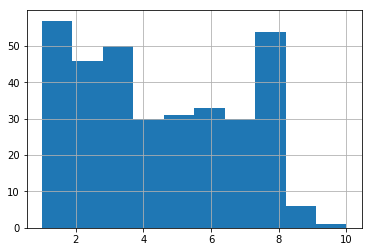

In [28]:
%matplotlib inline
df7.groupby('StudentNumber').count()['SchoolYear'].hist()
print(df7.groupby('StudentNumber').count().mean().ScaleScore)

In [29]:
df7.isna().sum()

SchoolYear             0
Semester               0
TestName               0
TestCategory           0
MeasureCode            0
StudentNumber          0
Grade                  0
SchoolNum              7
SchoolName             7
SkillName              0
RawScore            1478
ScaleScore             0
Growth               392
ProficiencyLevel       0
Test                   0
dtype: int64

In [30]:
df8 = df.groupby('StudentNumber').count()
df8.sort_values(by='ScaleScore', ascending=False, inplace = True)
per_student = df8.ScaleScore
per_student

StudentNumber
694461    2975
738209    2845
735959    2757
761090    2582
695593    2486
753668    2467
672737    2303
720143    2064
721898    2031
733725    1977
713443    1888
702615    1841
736790    1827
729575    1804
664315    1743
705459    1743
713617    1733
669773    1718
680541    1709
738392    1678
720927    1677
710514    1622
719558    1617
746532    1583
683295    1570
716038    1558
683578    1553
730288    1551
709909    1548
708370    1497
          ... 
401551      11
815281      11
561830      11
810713      10
737292       8
715946       8
828475       7
834409       6
672208       6
730319       6
798171       6
834411       6
834311       6
635516       5
731139       5
444673       5
827472       4
725858       4
815229       4
768154       3
761314       3
795755       3
814693       3
741930       3
712130       2
844422       2
790011       2
750016       1
821942       1
702773       1
Name: ScaleScore, Length: 643, dtype: int64

Starting to look at time series data for CSAP scores.

In [31]:
df_kid = pd.read_csv('kid_info.csv')
df_kid.head()

,StudentNumber,STATE_ID,CHIP_ID,DPS_HomeLg,CYI_Lat,CYI_Deg,REPTA,LEPTA,Disability,GT,FR_Lunch,Sect504,SPED
0,401551,2.609762e+09,NaN,English,2.0,2.0,profound,profound,1,0.0,1.0,0.100000,0.800000
1,401568,3.887922e+09,NaN,English,NaN,NaN,no HL info,no HL info,2,0.0,1.0,0.111111,0.666667
2,405587,7.176973e+09,305,English,2.0,2.0,95,75,1,0.0,1.0,0.100000,0.800000
3,415101,4.102385e+09,NaN,English,NaN,NaN,no HL info,no HL info,2,0.0,1.0,0.100000,0.800000
4,417458,9.911067e+09,NaN,English,2.0,1.0,33,60,2,0.0,0.0,0.090909,0.818182


In [32]:
df_kid.dtypes

StudentNumber      int64
STATE_ID         float64
CHIP_ID           object
DPS_HomeLg        object
CYI_Lat          float64
CYI_Deg          float64
REPTA             object
LEPTA             object
Disability        object
GT               float64
FR_Lunch         float64
Sect504          float64
SPED             float64
dtype: object

In [33]:
disab = df_kid.Disability.unique().astype('str')
for code in np.sort(disab):
    print(code)

 2?
1
2
nan


In [34]:
df_kid['Disability'] = df_kid['Disability'].replace(' 2?', 2)
df_kid['Disability'] = df_kid['Disability'].replace('1', 0)
df_kid['Disability'] = df_kid['Disability'].replace('2', 1)
df_kid['Disability'] = df_kid['Disability'].replace(2, 1)
df_kid = df_kid[pd.notnull(df_kid.Disability)]

In [35]:
df_kid.shape

(661, 13)

In [36]:
df_kid.dtypes

StudentNumber      int64
STATE_ID         float64
CHIP_ID           object
DPS_HomeLg        object
CYI_Lat          float64
CYI_Deg          float64
REPTA             object
LEPTA             object
Disability       float64
GT               float64
FR_Lunch         float64
Sect504          float64
SPED             float64
dtype: object

In [37]:
df_kid.Disability = df_kid.Disability.astype('int')

In [38]:
# Get number of years for each kid
df9 = df.groupby('StudentNumber')['SchoolYear'].nunique()

merge this into df_kid dataframe

In [39]:
merge1 = df_kid.merge(df9,how='inner',on='StudentNumber')
merge1.head()

,StudentNumber,STATE_ID,CHIP_ID,DPS_HomeLg,CYI_Lat,CYI_Deg,REPTA,LEPTA,Disability,GT,FR_Lunch,Sect504,SPED,SchoolYear
0,401551,2.609762e+09,NaN,English,2.0,2.0,profound,profound,0,0.0,1.0,0.100000,0.800000,3
1,401568,3.887922e+09,NaN,English,NaN,NaN,no HL info,no HL info,1,0.0,1.0,0.111111,0.666667,5
2,405587,7.176973e+09,305,English,2.0,2.0,95,75,0,0.0,1.0,0.100000,0.800000,9
3,415101,4.102385e+09,NaN,English,NaN,NaN,no HL info,no HL info,1,0.0,1.0,0.100000,0.800000,7
4,417458,9.911067e+09,NaN,English,2.0,1.0,33,60,1,0.0,0.0,0.090909,0.818182,4


In [40]:
merge1.rename(columns={'SchoolYear':'NumYears'},inplace=True)
merge1.head()

,StudentNumber,STATE_ID,CHIP_ID,DPS_HomeLg,CYI_Lat,CYI_Deg,REPTA,LEPTA,Disability,GT,FR_Lunch,Sect504,SPED,NumYears
0,401551,2.609762e+09,NaN,English,2.0,2.0,profound,profound,0,0.0,1.0,0.100000,0.800000,3
1,401568,3.887922e+09,NaN,English,NaN,NaN,no HL info,no HL info,1,0.0,1.0,0.111111,0.666667,5
2,405587,7.176973e+09,305,English,2.0,2.0,95,75,0,0.0,1.0,0.100000,0.800000,9
3,415101,4.102385e+09,NaN,English,NaN,NaN,no HL info,no HL info,1,0.0,1.0,0.100000,0.800000,7
4,417458,9.911067e+09,NaN,English,2.0,1.0,33,60,1,0.0,0.0,0.090909,0.818182,4


In [41]:
merge1.shape

(629, 14)

Need to collapse by child, with CSAP scores by grade in separate columns, and same for STAR Early Literacy Scores

In [42]:
csapr = df[df['Test']=='CSAP Reading Reading']
print(csapr.shape)
csapr.head()


(1478, 15)


,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
70,2000-01-01,Spring,CSAP Reading,CSAP,Reading,405587,4,287.0,Castro Elementary School,Reading,NaN,414.0,NaN,U,CSAP Reading Reading
108,2001-01-01,Spring,CSAP Reading,CSAP,Reading,405587,5,287.0,Castro Elementary School,Reading,NaN,220.0,NaN,U,CSAP Reading Reading
165,2002-01-01,Spring,CSAP Reading,CSAP,Reading,405587,6,407.0,Hill Campus of Arts and Sciences,Reading,NaN,260.0,NaN,U,CSAP Reading Reading
199,2003-01-01,Spring,CSAP Reading,CSAP,Reading,405587,7,407.0,Hill Campus of Arts and Sciences,Reading,NaN,476.0,62.0,U,CSAP Reading Reading
223,2004-01-01,Spring,CSAP Reading,CSAP,Reading,405587,7,407.0,Hill Campus of Arts and Sciences,Reading,NaN,503.0,NaN,U,CSAP Reading Reading


In [43]:
csapr_P = pd.pivot_table(csapr, values = 'ScaleScore',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
csapr_P.head()


Grade,3,4,5,6,7,8,9,10
StudentNumber,,,,,,,,
405587,NaN,414.0,220.0,260.0,503.0,537.0,559.0,597.0
415101,NaN,NaN,NaN,260.0,NaN,NaN,NaN,550.0
417855,309.0,405.0,487.0,502.0,300.0,330.0,544.0,539.0
419934,NaN,373.0,439.0,509.0,496.0,550.0,586.0,569.0
445477,527.0,554.0,508.0,535.0,563.0,576.0,613.0,609.0


In [44]:
merge2 = merge1.merge(csapr_P,how='outer',on='StudentNumber')
merge2.head()

,StudentNumber,STATE_ID,CHIP_ID,DPS_HomeLg,CYI_Lat,CYI_Deg,REPTA,LEPTA,Disability,GT,...,SPED,NumYears,3,4,5,6,7,8,9,10
0,401551,2.609762e+09,NaN,English,2.0,2.0,profound,profound,0.0,0.0,...,0.800000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401568,3.887922e+09,NaN,English,NaN,NaN,no HL info,no HL info,1.0,0.0,...,0.666667,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,405587,7.176973e+09,305,English,2.0,2.0,95,75,0.0,0.0,...,0.800000,9.0,NaN,414.0,220.0,260.0,503.0,537.0,559.0,597.0
3,415101,4.102385e+09,NaN,English,NaN,NaN,no HL info,no HL info,1.0,0.0,...,0.800000,7.0,NaN,NaN,NaN,260.0,NaN,NaN,NaN,550.0
4,417458,9.911067e+09,NaN,English,2.0,1.0,33,60,1.0,0.0,...,0.818182,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
merge2.columns

Index(['StudentNumber',      'STATE_ID',       'CHIP_ID',    'DPS_HomeLg',
             'CYI_Lat',       'CYI_Deg',         'REPTA',         'LEPTA',
          'Disability',            'GT',      'FR_Lunch',       'Sect504',
                'SPED',      'NumYears',               3,               4,
                     5,               6,               7,               8,
                     9,              10],
      dtype='object')

In [46]:
merge2.rename(columns={3:"CSAPR3", 4:"CSAPR4", 5:"CSAPR5", 6:"CSAPR6",
                       7:"CSAPR7", 8:"CSAPR8", 9:"CSAPR9", 10:"CSAPR10"}, inplace=True)
print(merge2.head())
print(merge2.shape)
merge2.columns

   StudentNumber      STATE_ID CHIP_ID DPS_HomeLg  CYI_Lat  CYI_Deg  \
0         401551  2.609762e+09     NaN    English      2.0      2.0   
1         401568  3.887922e+09     NaN    English      NaN      NaN   
2         405587  7.176973e+09     305    English      2.0      2.0   
3         415101  4.102385e+09     NaN    English      NaN      NaN   
4         417458  9.911067e+09     NaN    English      2.0      1.0   

        REPTA       LEPTA  Disability   GT  ...      SPED  NumYears  CSAPR3  \
0    profound    profound         0.0  0.0  ...  0.800000       3.0     NaN   
1  no HL info  no HL info         1.0  0.0  ...  0.666667       5.0     NaN   
2          95          75         0.0  0.0  ...  0.800000       9.0     NaN   
3  no HL info  no HL info         1.0  0.0  ...  0.800000       7.0     NaN   
4          33          60         1.0  0.0  ...  0.818182       4.0     NaN   

   CSAPR4  CSAPR5  CSAPR6  CSAPR7  CSAPR8  CSAPR9  CSAPR10  
0     NaN     NaN     NaN     NaN    

Index(['StudentNumber', 'STATE_ID', 'CHIP_ID', 'DPS_HomeLg', 'CYI_Lat',
       'CYI_Deg', 'REPTA', 'LEPTA', 'Disability', 'GT', 'FR_Lunch', 'Sect504',
       'SPED', 'NumYears', 'CSAPR3', 'CSAPR4', 'CSAPR5', 'CSAPR6', 'CSAPR7',
       'CSAPR8', 'CSAPR9', 'CSAPR10'],
      dtype='object')

In [47]:
csapm = df[df['Test']=='CSAP Math Math']
csapm_P = pd.pivot_table(csapm, values = 'ScaleScore',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
merge3 = merge2.merge(csapm_P,how='outer',on='StudentNumber')
merge3.rename(columns={3:"CSAPM3", 4:"CSAPM4", 5:"CSAPM5", 6:"CSAPM6", 
                       7:"CSAPM7", 8:"CSAPM8", 9:"CSAPM9", 10:"CSAPM10"}, inplace=True)
print(merge3.head())
print(merge3.shape)
merge3.columns

   StudentNumber      STATE_ID CHIP_ID DPS_HomeLg  CYI_Lat  CYI_Deg  \
0         401551  2.609762e+09     NaN    English      2.0      2.0   
1         401568  3.887922e+09     NaN    English      NaN      NaN   
2         405587  7.176973e+09     305    English      2.0      2.0   
3         415101  4.102385e+09     NaN    English      NaN      NaN   
4         417458  9.911067e+09     NaN    English      2.0      1.0   

        REPTA       LEPTA  Disability   GT  ...  CSAPR9  CSAPR10  CSAPM3  \
0    profound    profound         0.0  0.0  ...     NaN      NaN     NaN   
1  no HL info  no HL info         1.0  0.0  ...     NaN      NaN     NaN   
2          95          75         0.0  0.0  ...   559.0    597.0     NaN   
3  no HL info  no HL info         1.0  0.0  ...     NaN    550.0     NaN   
4          33          60         1.0  0.0  ...     NaN      NaN     NaN   

   CSAPM4  CSAPM5  CSAPM6  CSAPM7  CSAPM8  CSAPM9  CSAPM10  
0     NaN     NaN     NaN     NaN     NaN     NaN      

Index(['StudentNumber', 'STATE_ID', 'CHIP_ID', 'DPS_HomeLg', 'CYI_Lat',
       'CYI_Deg', 'REPTA', 'LEPTA', 'Disability', 'GT', 'FR_Lunch', 'Sect504',
       'SPED', 'NumYears', 'CSAPR3', 'CSAPR4', 'CSAPR5', 'CSAPR6', 'CSAPR7',
       'CSAPR8', 'CSAPR9', 'CSAPR10', 'CSAPM3', 'CSAPM4', 'CSAPM5', 'CSAPM6',
       'CSAPM7', 'CSAPM8', 'CSAPM9', 'CSAPM10'],
      dtype='object')

In [48]:
csapw = df[df['Test']=='CSAP Writing Writing']
csapw_P = pd.pivot_table(csapw, values = 'ScaleScore',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
merge4 = merge3.merge(csapw_P,how='outer',on='StudentNumber')
merge4.rename(columns={3:"CSAPW3", 4:"CSAPW4", 5:"CSAPW5", 6:"CSAPW6", 
                       7:"CSAPW7", 8:"CSAPW8", 9:"CSAPW9", 10:"CSAPW10"}, inplace=True)

In [49]:
sele = df[df['Test']=='STAR Early Literacy Enterprise Reading']
sele_P = pd.pivot_table(sele, values = 'ScaleScore',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
merge5 = merge4.merge(sele_P,how='outer',on='StudentNumber')
merge5.rename(columns={0:"SELE0", 1:"SELE1", 2:"SELE2", 3:"SELE3",
                       4:"SELE4", 5:"SELE5"}, inplace=True)

In [50]:
sre = df[df['Test']=='STAR Reading Enterprise Reading']
sre_P = pd.pivot_table(sre, values = 'ScaleScore',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
merge6 = merge5.merge(sre_P,how='outer',on='StudentNumber')
merge6.rename(columns={0:"SRE0", 1:"SRE1", 2:"SRE2", 3:"SRE3", 4:"SRE4", 5:"SRE5",
                       6:"SRE6", 7:"SRE7", 8:"SRE8", 9:"SRE9", 10:"SRE10", 11:"SRE11",
                       12:"SRE12"}, inplace=True)


In [51]:
merge6.columns

Index(['StudentNumber', 'STATE_ID', 'CHIP_ID', 'DPS_HomeLg', 'CYI_Lat',
       'CYI_Deg', 'REPTA', 'LEPTA', 'Disability', 'GT', 'FR_Lunch', 'Sect504',
       'SPED', 'NumYears', 'CSAPR3', 'CSAPR4', 'CSAPR5', 'CSAPR6', 'CSAPR7',
       'CSAPR8', 'CSAPR9', 'CSAPR10', 'CSAPM3', 'CSAPM4', 'CSAPM5', 'CSAPM6',
       'CSAPM7', 'CSAPM8', 'CSAPM9', 'CSAPM10', 'CSAPW3', 'CSAPW4', 'CSAPW5',
       'CSAPW6', 'CSAPW7', 'CSAPW8', 'CSAPW9', 'CSAPW10', 'SELE0', 'SELE1',
       'SELE2', 'SELE3', 'SELE4', 'SELE5', 'SRE0', 'SRE1', 'SRE2', 'SRE3',
       'SRE4', 'SRE5', 'SRE6', 'SRE7', 'SRE8', 'SRE9', 'SRE10', 'SRE11',
       'SRE12'],
      dtype='object')

GT, FR_Lunch, Sect504, and SPED are all composite scores, or the percentage of time the student participated in each of these programs.  Add in time series data for these 4 categories, as well.

In [52]:
merge6.drop(['STATE_ID', 'CHIP_ID','REPTA','LEPTA'], axis=1, inplace=True)
merge6.head()

,StudentNumber,DPS_HomeLg,CYI_Lat,CYI_Deg,Disability,GT,FR_Lunch,Sect504,SPED,NumYears,...,SRE3,SRE4,SRE5,SRE6,SRE7,SRE8,SRE9,SRE10,SRE11,SRE12
0,401551,English,2.0,2.0,0.0,0.0,1.0,0.100000,0.800000,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401568,English,NaN,NaN,1.0,0.0,1.0,0.111111,0.666667,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,405587,English,2.0,2.0,0.0,0.0,1.0,0.100000,0.800000,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,415101,English,NaN,NaN,1.0,0.0,1.0,0.100000,0.800000,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,417458,English,2.0,1.0,1.0,0.0,0.0,0.090909,0.818182,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
merge6.rename(columns={"GT":"GT_C", "FR_Lunch":"FRL_C", "Sect504":"Sect504_C", 
                       "SPED":"SPED_C"}, inplace=True)
merge6.head()

,StudentNumber,DPS_HomeLg,CYI_Lat,CYI_Deg,Disability,GT_C,FRL_C,Sect504_C,SPED_C,NumYears,...,SRE3,SRE4,SRE5,SRE6,SRE7,SRE8,SRE9,SRE10,SRE11,SRE12
0,401551,English,2.0,2.0,0.0,0.0,1.0,0.100000,0.800000,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401568,English,NaN,NaN,1.0,0.0,1.0,0.111111,0.666667,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,405587,English,2.0,2.0,0.0,0.0,1.0,0.100000,0.800000,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,415101,English,NaN,NaN,1.0,0.0,1.0,0.100000,0.800000,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,417458,English,2.0,1.0,1.0,0.0,0.0,0.090909,0.818182,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
demo = pd.read_csv('demographics.csv')
demo.head()

,SchoolYear,StudentNumber,StateID,GTStatus,FRLStatus,Section504,SPEDStatus,PrimaryDisability
0,2000-2001,401551,2609762005,Non-GT,Free/Reduced,No,No,No Disability
1,2001-2002,401551,2609762005,Non-GT,Free/Reduced,Yes,No,No Disability
2,2002-2003,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities
3,2003-2004,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities
4,2004-2005,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities


In [55]:
demo.SchoolYear = pd.to_datetime(demo.SchoolYear.str[:4])

In [56]:
demo_grade = demo.merge(df,how='inner',on=['StudentNumber','SchoolYear'])
demo_grade.head()

,SchoolYear,StudentNumber,StateID,GTStatus,FRLStatus,Section504,SPEDStatus,PrimaryDisability,Semester,TestName,...,MeasureCode,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
0,2003-01-01,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Writing,...,Writing,8,401.0,Baker Middle School,Writing,NaN,19.0,NaN,EM,CSAPA Online Writing Writing
1,2003-01-01,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Reading,...,Reading,8,401.0,Baker Middle School,Reading,NaN,25.0,NaN,EM,CSAPA Online Reading Reading
2,2003-01-01,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Math,...,Math,8,401.0,Baker Middle School,Math,NaN,14.0,NaN,EX,CSAPA Online Math Math
3,2003-01-01,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Science,...,Science,8,401.0,Baker Middle School,Science,NaN,18.0,NaN,EX,CSAPA Online Science Science
4,2004-01-01,401551,2609762005,Non-GT,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Paper Writing,...,Writing,9,455.0,North High School,Writing,NaN,1.0,NaN,IN,CSAPA Paper Writing Writing


In [58]:
demo_grade.shape

(255394, 21)

In [59]:
giftal = demo_grade.GTStatus.unique().astype('str')
for gif in giftal:
    print(gif)

Non-GT
GT
HGT


In [60]:
#demo_grade['GTStatus'] = demo_grade['GTStatus'].map({'Non-GT': 0, 'GT': 1, 'HGT':1})
demo_grade['GTStatus'] = demo_grade['GTStatus'].replace('Non-GT', 0)
demo_grade['GTStatus'] = demo_grade['GTStatus'].replace('GT', 1)
demo_grade['GTStatus'] = demo_grade['GTStatus'].replace('HGT', 1)
demo_grade.head()

,SchoolYear,StudentNumber,StateID,GTStatus,FRLStatus,Section504,SPEDStatus,PrimaryDisability,Semester,TestName,...,MeasureCode,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
0,2003-01-01,401551,2609762005,0,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Writing,...,Writing,8,401.0,Baker Middle School,Writing,NaN,19.0,NaN,EM,CSAPA Online Writing Writing
1,2003-01-01,401551,2609762005,0,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Reading,...,Reading,8,401.0,Baker Middle School,Reading,NaN,25.0,NaN,EM,CSAPA Online Reading Reading
2,2003-01-01,401551,2609762005,0,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Math,...,Math,8,401.0,Baker Middle School,Math,NaN,14.0,NaN,EX,CSAPA Online Math Math
3,2003-01-01,401551,2609762005,0,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Online Science,...,Science,8,401.0,Baker Middle School,Science,NaN,18.0,NaN,EX,CSAPA Online Science Science
4,2004-01-01,401551,2609762005,0,Free/Reduced,No,Yes,Multiple Disabilities,Spring,CSAPA Paper Writing,...,Writing,9,455.0,North High School,Writing,NaN,1.0,NaN,IN,CSAPA Paper Writing Writing


In [61]:
giftal = demo_grade.GTStatus.unique().astype('str')
for gif in giftal:
    print(gif)

0
1


In [62]:
GT_P = pd.pivot_table(demo_grade, values = 'GTStatus',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
GT_P.head()

Grade,0,1,2,3,4,5,6,7,8,9,10,11,12
StudentNumber,,,,,,,,,,,,,
401551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
401568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
405587,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
415101,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
417458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [63]:
merge7 = merge6.merge(GT_P,how='outer',on='StudentNumber')
merge7.rename(columns={0:"GT0", 1:"GT1", 2:"GT2", 3:"GT3", 4:"GT4", 5:"GT5", 6:"GT6", 
                       7:"GT7", 8:"GT8", 9:"GT9", 10:"GT10", 11:"GT11", 12:"GT12"}, inplace=True)


In [64]:
frl = demo_grade.FRLStatus.unique()
frl

array(['Free/Reduced', 'Paid'], dtype=object)

In [65]:
demo_grade['FRLStatus'] = demo_grade['FRLStatus'].replace('Free/Reduced', 1)
demo_grade['FRLStatus'] = demo_grade['FRLStatus'].replace('Paid', 0)
FRL_P = pd.pivot_table(demo_grade, values = 'FRLStatus',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
FRL_P.head()

Grade,0,1,2,3,4,5,6,7,8,9,10,11,12
StudentNumber,,,,,,,,,,,,,
401551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
401568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
405587,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
415101,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
417458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [66]:
merge8 = merge7.merge(FRL_P,how='outer',on='StudentNumber')
merge8.rename(columns={0:"FRL0", 1:"FRL1", 2:"FRL2", 3:"FRL3", 4:"FRL4", 5:"FRL5", 6:"FRL6", 
                       7:"FRL7", 8:"FRL8", 9:"FRL9", 10:"FRL10", 11:"FRL11", 12:"FRL12"}, inplace=True)


In [67]:
demo_grade['Section504'] = demo_grade['Section504'].replace('Yes', 1)
demo_grade['Section504'] = demo_grade['Section504'].replace('No', 0)
demo_grade['SPEDStatus'] = demo_grade['SPEDStatus'].replace('Yes', 1)
demo_grade['SPEDStatus'] = demo_grade['SPEDStatus'].replace('No', 0)
demo_grade.head()

,SchoolYear,StudentNumber,StateID,GTStatus,FRLStatus,Section504,SPEDStatus,PrimaryDisability,Semester,TestName,...,MeasureCode,Grade,SchoolNum,SchoolName,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
0,2003-01-01,401551,2609762005,0,1,0,1,Multiple Disabilities,Spring,CSAPA Online Writing,...,Writing,8,401.0,Baker Middle School,Writing,NaN,19.0,NaN,EM,CSAPA Online Writing Writing
1,2003-01-01,401551,2609762005,0,1,0,1,Multiple Disabilities,Spring,CSAPA Online Reading,...,Reading,8,401.0,Baker Middle School,Reading,NaN,25.0,NaN,EM,CSAPA Online Reading Reading
2,2003-01-01,401551,2609762005,0,1,0,1,Multiple Disabilities,Spring,CSAPA Online Math,...,Math,8,401.0,Baker Middle School,Math,NaN,14.0,NaN,EX,CSAPA Online Math Math
3,2003-01-01,401551,2609762005,0,1,0,1,Multiple Disabilities,Spring,CSAPA Online Science,...,Science,8,401.0,Baker Middle School,Science,NaN,18.0,NaN,EX,CSAPA Online Science Science
4,2004-01-01,401551,2609762005,0,1,0,1,Multiple Disabilities,Spring,CSAPA Paper Writing,...,Writing,9,455.0,North High School,Writing,NaN,1.0,NaN,IN,CSAPA Paper Writing Writing


In [68]:
S504_P = pd.pivot_table(demo_grade, values = 'Section504',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
merge9 = merge8.merge(S504_P,how='outer',on='StudentNumber')
merge9.rename(columns={0:"S5040", 1:"S5041", 2:"S5042", 3:"S5043", 4:"S5044", 5:"S5045", 
                       6:"S5046", 7:"S5047", 8:"S5048", 9:"S5049", 10:"S50410", 11:"S50411", 
                       12:"S50412"}, inplace=True)


In [69]:
SPED_P = pd.pivot_table(demo_grade, values = 'SPEDStatus',index=['StudentNumber'],columns='Grade',aggfunc=np.max)
merge10 = merge9.merge(SPED_P,how='outer',on='StudentNumber')
merge10.rename(columns={0:"SPED0", 1:"SPED1", 2:"SPED2", 3:"SPED3", 4:"SPED4", 5:"SPED5", 
                       6:"SPED6", 7:"SPED7", 8:"SPED8", 9:"SPED9", 10:"SPED10", 11:"SPED11", 
                       12:"SPED12"}, inplace=True)


In [70]:
merge10.dtypes

StudentNumber      int64
DPS_HomeLg        object
CYI_Lat          float64
CYI_Deg          float64
Disability       float64
GT_C             float64
FRL_C            float64
Sect504_C        float64
SPED_C           float64
NumYears         float64
CSAPR3           float64
CSAPR4           float64
CSAPR5           float64
CSAPR6           float64
CSAPR7           float64
CSAPR8           float64
CSAPR9           float64
CSAPR10          float64
CSAPM3           float64
CSAPM4           float64
CSAPM5           float64
CSAPM6           float64
CSAPM7           float64
CSAPM8           float64
CSAPM9           float64
CSAPM10          float64
CSAPW3           float64
CSAPW4           float64
CSAPW5           float64
CSAPW6           float64
                  ...   
FRL9             float64
FRL10            float64
FRL11            float64
FRL12            float64
S5040            float64
S5041            float64
S5042            float64
S5043            float64
S5044            float64


In [71]:
merge10.to_csv('Cleaned_DF.csv')

In [72]:
merge10.head()

,StudentNumber,DPS_HomeLg,CYI_Lat,CYI_Deg,Disability,GT_C,FRL_C,Sect504_C,SPED_C,NumYears,...,SPED3,SPED4,SPED5,SPED6,SPED7,SPED8,SPED9,SPED10,SPED11,SPED12
0,401551,English,2.0,2.0,0.0,0.0,1.0,0.100000,0.800000,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
1,401568,English,NaN,NaN,1.0,0.0,1.0,0.111111,0.666667,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,NaN
2,405587,English,2.0,2.0,0.0,0.0,1.0,0.100000,0.800000,9.0,...,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,415101,English,NaN,NaN,1.0,0.0,1.0,0.100000,0.800000,7.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
4,417458,English,2.0,1.0,1.0,0.0,0.0,0.090909,0.818182,4.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN


Dependent Measure -- CSAP Reading ScaleScore

Predictors:

    Star Early Literacy Enterprise
    Home Language
    Laterality
    Degree of Hearing Loss
    Disability
    Gifted/Talented
    Free/Reduced Lunch
    Section 504
    Special Ed

Alternate DVs:

    CSAP Writing 
    CSAP Math
    Star Reading
    
Time Series Data:

     CSAP Reading
     CSAP Writing
     CSAP Math
     Star Early Literacy
     Star Reading Enterprise
     Gifted/Talented
     Free/Reduced Lunch
     Section 504
     Special Ed
    